# Titanic Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Importing the required Libraries

In [3]:
tit_proj = pd.read_csv("titanic_train.csv")

In [4]:
tit_proj

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
tit_proj.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
tit_proj.shape

(891, 12)

Total number of rows = 891 and columns = 12

In [7]:
tit_proj.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above case, we have 177 missing values in Age and 687 values in cabin

In [8]:
for val in tit_proj.columns:
    print(tit_proj[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Frost, Mr. Anthony Wood "Archie"                       1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Zimmerman, Mr. Leo                                     1
Hoyt, Mr. Frederick Maxfield                           1
Andersson, Miss. Ellis Anna Maria                      1
                                                      ..
Turkula, Mrs. (Hedwig)                                 1
Beckwith, Mr. Richard Leonard                          1
Beane, Mrs. Edward (Ethel Clarke)                      1
Graham, Mr. George Edward                              1
Taylor, Mr. Elmer Zebley                               1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    

In [9]:
tit_proj.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
tit_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Describing Dataset ---

In [12]:
tit_proj.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
tit_proj["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

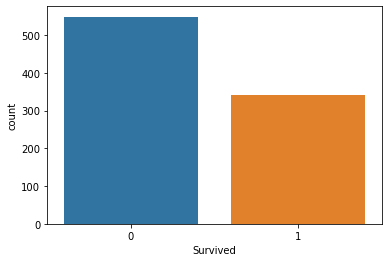

In [14]:
sns.countplot(tit_proj["Survived"])
plt.show()

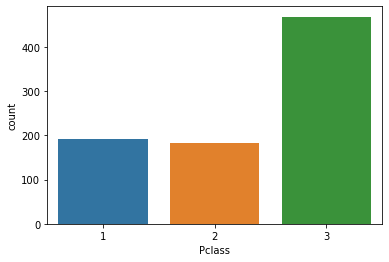

In [112]:
sns.countplot(tit_proj["Pclass"])
plt.show()

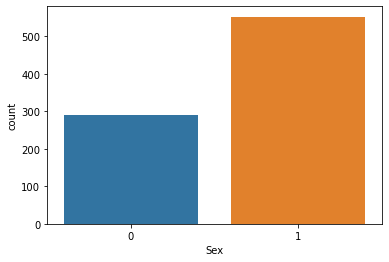

In [114]:
sns.countplot(tit_proj["Sex"])
plt.show()

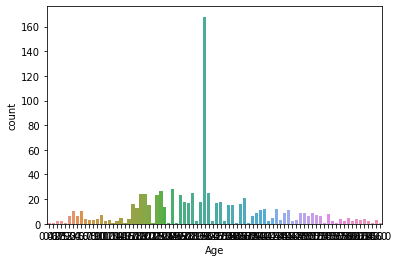

In [115]:
sns.countplot(tit_proj["Age"])
plt.show()

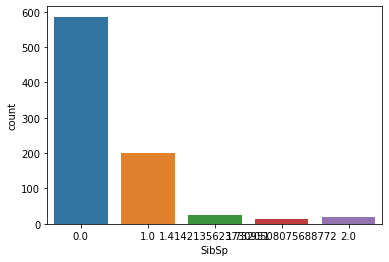

In [121]:
sns.countplot(tit_proj["SibSp"])
plt.show()

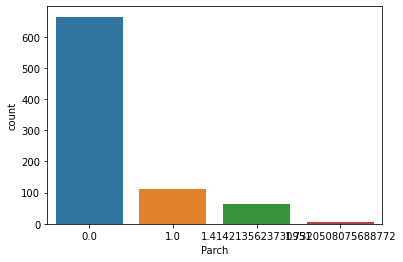

In [122]:
sns.countplot(tit_proj["Parch"])
plt.show()

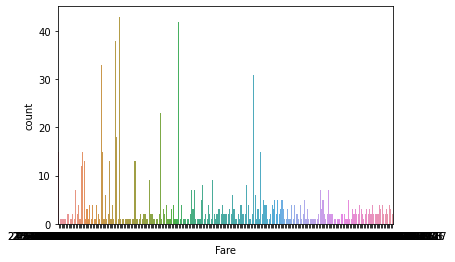

In [136]:
sns.countplot(tit_proj["Fare"])
plt.show()

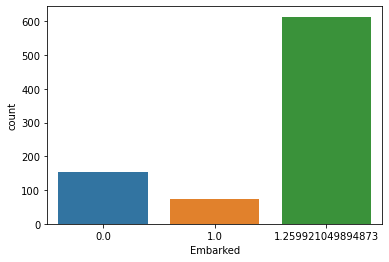

In [123]:
sns.countplot(tit_proj["Embarked"])
plt.show()

In [18]:
tit_proj.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
tit_proj.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's remove these missing values

In [20]:
tit_proj.drop('Cabin',axis=1,inplace=True)

In [21]:
tit_proj.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

From the above case, Cabin is removed

In [22]:
tit_proj['Age'].fillna(tit_proj['Age'].mean(),inplace=True)

From the above case, we are replacing the missing values of Age with the mean values

In [23]:
tit_proj.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [24]:
tit_proj['Embarked'].fillna(tit_proj['Embarked'].mode()[0],inplace=True)

From the above case, we are filling the Embarked with the most frequent values

In [25]:
tit_proj.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Finally we don't have any null values now

# Encoding Categorical Data ---

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lab_enc = LabelEncoder()

In [28]:
tit_proj

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [30]:
cols = ["Sex","Embarked"]
for col in cols:
    tit_proj[col] = lab_enc.fit_transform(tit_proj[col])

tit_proj

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [31]:
tit_proj.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [33]:
import numpy as np
tit_proj.skew()
for col in tit_proj.skew().index:
    if col in tit_proj.columns:
        if tit_proj.skew().loc[col]>0.65:
            tit_proj[col]=np.sqrt(tit_proj[col])
        if tit_proj.skew().loc[col]<-0.65:
            tit_proj[col]=np.cbrt(tit_proj[col])

tit_proj.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          1.436526
Parch          1.529799
Fare           2.085004
Embarked      -1.520662
dtype: float64

# Normal Distribution Curve ---

In [130]:
tit_proj.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Density'>

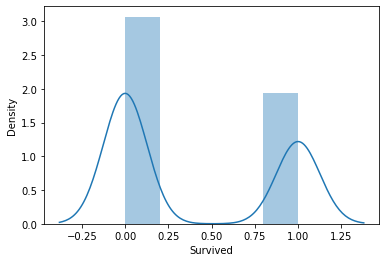

In [131]:
sns.distplot(tit_proj["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

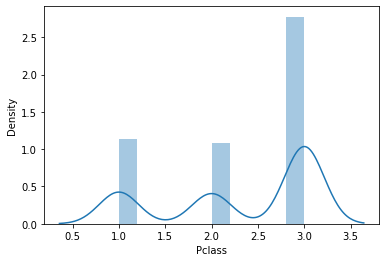

In [133]:
sns.distplot(tit_proj["Pclass"])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

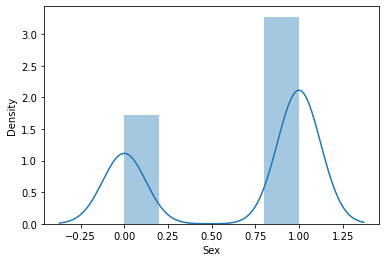

In [134]:
sns.distplot(tit_proj["Sex"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

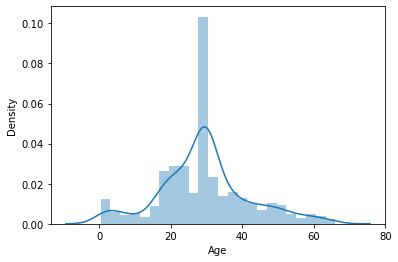

In [135]:
sns.distplot(tit_proj["Age"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

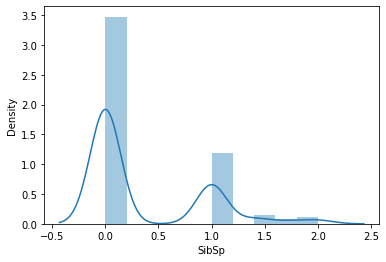

In [137]:
sns.distplot(tit_proj["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

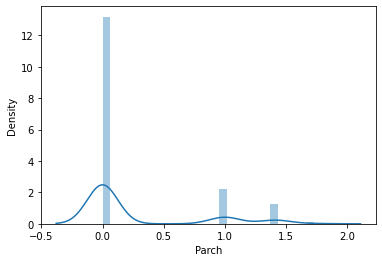

In [138]:
sns.distplot(tit_proj["Parch"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

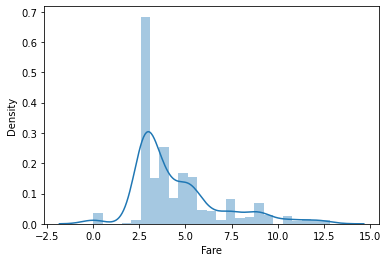

In [140]:
sns.distplot(tit_proj["Fare"])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

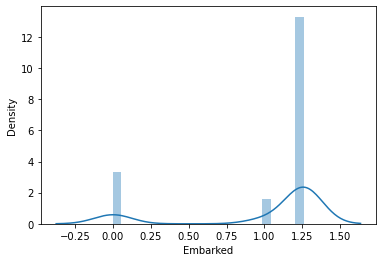

In [141]:
sns.distplot(tit_proj["Embarked"])

# Correlation ---

In [34]:
tit_proj.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.063602,0.000348,0.004035,0.006254
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,0.043535,0.121652,0.312508,-0.170667
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.006049,-0.006792,-0.660850,0.212893
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.173428,-0.257096,-0.237325,0.094886
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.217329,-0.237261,0.108745,-0.030306
SibSp,-0.063602,0.043535,0.006049,-0.173428,-0.217329,1.000000,0.473591,0.309346,0.021656
Parch,0.000348,0.121652,-0.006792,-0.257096,-0.237261,0.473591,1.000000,0.320344,0.002304
Fare,0.004035,0.312508,-0.660850,-0.237325,0.108745,0.309346,0.320344,1.000000,-0.263657
Embarked,0.006254,-0.170667,0.212893,0.094886,-0.030306,0.021656,0.002304,-0.263657,1.000000


Correlation using Heatmap

<AxesSubplot:>

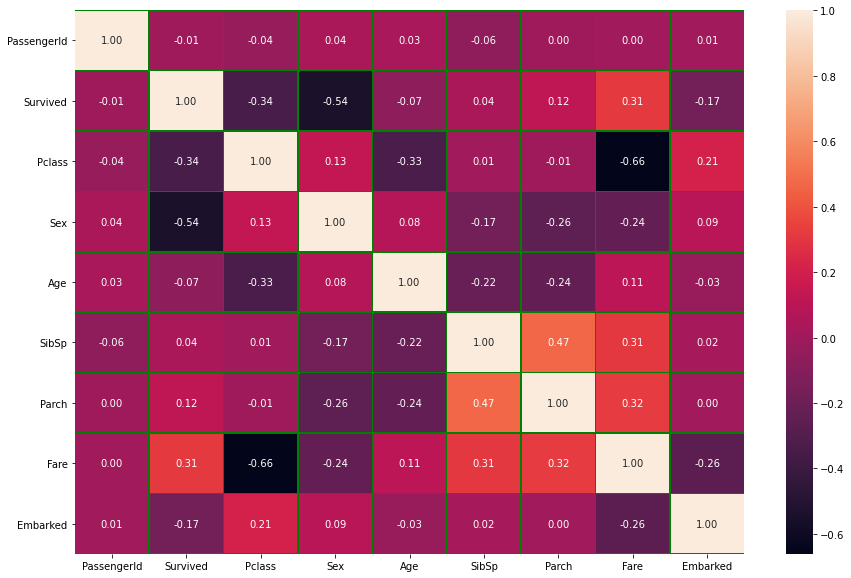

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(tit_proj.corr(),annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

In [36]:
tit_proj

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1.0,0.000000,A/5 21171,2.692582,1.259921
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1.0,0.000000,PC 17599,8.442944,0.000000
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0.0,0.000000,STON/O2. 3101282,2.815138,1.259921
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1.0,0.000000,113803,7.286975,1.259921
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0.0,0.000000,373450,2.837252,1.259921
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0.0,0.000000,211536,3.605551,1.259921
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0.0,0.000000,112053,5.477226,1.259921
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1.0,1.414214,W./C. 6607,4.842520,1.259921
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0.0,0.000000,111369,5.477226,0.000000


In [37]:
tit_proj.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

Sex is highly Negatively Correlated with the Survived Columns

In [38]:
threshold=3
from scipy.stats import zscore
z = np.abs(zscore(tit_proj))

In [39]:
np.where(z>3)

(array([ 13,  25,  27,  59,  71,  88,  96, 116, 118, 159, 167, 180, 201,
        258, 299, 311, 324, 341, 360, 377, 380, 386, 438, 438, 480, 493,
        527, 557, 567, 610, 630, 638, 672, 678, 679, 683, 689, 700, 716,
        730, 737, 742, 745, 779, 792, 846, 851, 863, 885], dtype=int64),
 array([5, 5, 6, 4, 4, 6, 3, 3, 6, 4, 5, 4, 4, 6, 6, 6, 4, 6, 5, 6, 6, 4,
        5, 6, 4, 3, 6, 6, 5, 5, 3, 5, 3, 5, 6, 4, 6, 6, 6, 6, 6, 6, 3, 6,
        4, 4, 3, 4, 5], dtype=int64))

In [40]:
tit_proj = tit_proj[(z<3).all(axis=1)]

# Classification Model ---

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [42]:
x = tit_proj.drop(['Survived'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1.0,0.000000,2.692582,1.259921
1,1,0,38.000000,1.0,0.000000,8.442944,0.000000
2,3,0,26.000000,0.0,0.000000,2.815138,1.259921
3,1,0,35.000000,1.0,0.000000,7.286975,1.259921
4,3,1,35.000000,0.0,0.000000,2.837252,1.259921
...,...,...,...,...,...,...,...
886,2,1,27.000000,0.0,0.000000,3.605551,1.259921
887,1,0,19.000000,0.0,0.000000,5.477226,1.259921
888,3,0,29.699118,1.0,1.414214,4.842520,1.259921
889,1,1,26.000000,0.0,0.000000,5.477226,0.000000


In [43]:
y = tit_proj['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 843, dtype: int64

In [44]:
y.value_counts()

0    517
1    326
Name: Survived, dtype: int64

In [45]:
x_over,y_over = smote.fit_resample(x,y)

In [46]:
from sklearn.preprocessing import StandardScaler

stand_scale = StandardScaler()
x = stand_scale.fit_transform(x_over)
y = y_over

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

log_reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=43,test_size=.33)

In [48]:
x_train.shape

(692, 7)

In [49]:
y_train.shape

(692,)

# Logistic Regression --- 

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [51]:
pred_log_reg = log_reg.predict(x_test)
accuracy_score(pred_log_reg,y_test)

0.8070175438596491

In [52]:
confusion_matrix(pred_log_reg, y_test)

array([[139,  33],
       [ 33, 137]], dtype=int64)

In [53]:
print(classification_report(pred_log_reg, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       172
           1       0.81      0.81      0.81       170

    accuracy                           0.81       342
   macro avg       0.81      0.81      0.81       342
weighted avg       0.81      0.81      0.81       342



In [54]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnb = GaussianNB()

In [55]:
param = {'kernel':['linear','rbf','poly','sigmoid']}
gd = GridSearchCV(svc,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'kernel': 'poly'}


In [56]:
param = {'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2']}
gd = GridSearchCV(dtc,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}


In [57]:
param = {'n_neighbors':[7,5,9,11,15],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd = GridSearchCV(knc,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


In [62]:
svc = SVC(kernel='poly')
dtc = DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='random')
knc = KNeighborsClassifier(n_neighbors=11,algorithm='auto',weights='distance')

def fun(f):
    f.fit(x_train,y_train)
    pred = f.predict(x_test)
    print("Accuracy Score", accuracy_score(y_test,pred))
    print("Confusion Matrix", confusion_matrix(y_test,pred))
    print("Classsification Report", classification_report(y_test,pred))

fun(svc)

Accuracy Score 0.8362573099415205
Confusion Matrix [[151  21]
 [ 35 135]]
Classsification Report               precision    recall  f1-score   support

           0       0.81      0.88      0.84       172
           1       0.87      0.79      0.83       170

    accuracy                           0.84       342
   macro avg       0.84      0.84      0.84       342
weighted avg       0.84      0.84      0.84       342



In [63]:
fun(dtc)

Accuracy Score 0.7865497076023392
Confusion Matrix [[140  32]
 [ 41 129]]
Classsification Report               precision    recall  f1-score   support

           0       0.77      0.81      0.79       172
           1       0.80      0.76      0.78       170

    accuracy                           0.79       342
   macro avg       0.79      0.79      0.79       342
weighted avg       0.79      0.79      0.79       342



In [64]:
fun(knc)

Accuracy Score 0.8333333333333334
Confusion Matrix [[140  32]
 [ 25 145]]
Classsification Report               precision    recall  f1-score   support

           0       0.85      0.81      0.83       172
           1       0.82      0.85      0.84       170

    accuracy                           0.83       342
   macro avg       0.83      0.83      0.83       342
weighted avg       0.83      0.83      0.83       342



In [65]:
fun(gnb)

Accuracy Score 0.7865497076023392
Confusion Matrix [[129  43]
 [ 30 140]]
Classsification Report               precision    recall  f1-score   support

           0       0.81      0.75      0.78       172
           1       0.77      0.82      0.79       170

    accuracy                           0.79       342
   macro avg       0.79      0.79      0.79       342
weighted avg       0.79      0.79      0.79       342



In [72]:
fun(log_reg)

Accuracy Score 0.8070175438596491
Confusion Matrix [[139  33]
 [ 33 137]]
Classsification Report               precision    recall  f1-score   support

           0       0.81      0.81      0.81       172
           1       0.81      0.81      0.81       170

    accuracy                           0.81       342
   macro avg       0.81      0.81      0.81       342
weighted avg       0.81      0.81      0.81       342



# Cross Validation Score ---

In [67]:
from sklearn.model_selection import cross_val_score,KFold

def cvs(m):
    score = cross_val_score(m,x,y,cv=5)
    print("Score", score)
    print("Mean Score", score.mean())

cvs(svc)

Score [0.76811594 0.79710145 0.76328502 0.87922705 0.87864078]
Mean Score 0.8172740490596124


In [68]:
cvs(dtc)

Score [0.73913043 0.78743961 0.74879227 0.89855072 0.83009709]
Mean Score 0.8008020261713804


In [69]:
cvs(knc)

Score [0.77777778 0.83091787 0.79227053 0.87439614 0.84951456]
Mean Score 0.8249753763894752


In [70]:
cvs(gnb)

Score [0.71014493 0.78743961 0.74879227 0.82125604 0.81553398]
Mean Score 0.7766333661648142


In [71]:
cvs(log_reg)

Score [0.76811594 0.8115942  0.72463768 0.84541063 0.84466019]
Mean Score 0.7988837296562075


# Ensemble Method ---

In [83]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [74]:
param = {"n_estimators":[100,200,300,400,500],"random_state":[23,43,56,78,95]}
gd = GridSearchCV(rfc,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'n_estimators': 500, 'random_state': 56}


In [78]:
rfc = RandomForestClassifier(n_estimators=500,random_state=56)
fun(rfc)

Accuracy Score 0.8450292397660819
Confusion Matrix [[144  28]
 [ 25 145]]
Classsification Report               precision    recall  f1-score   support

           0       0.85      0.84      0.84       172
           1       0.84      0.85      0.85       170

    accuracy                           0.85       342
   macro avg       0.85      0.85      0.85       342
weighted avg       0.85      0.85      0.85       342



In [79]:
cvs(rfc)

Score [0.77777778 0.82608696 0.8115942  0.90338164 0.88349515]
Mean Score 0.8404671450682425


In [77]:
param = {"n_estimators":[100,200,300,400,500],"random_state":[23,43,56,78,95]}
grid = GridSearchCV(abc,param,cv=5)
grid.fit(x,y)
print(grid.best_params_)

{'n_estimators': 400, 'random_state': 23}


In [80]:
abc = AdaBoostClassifier(n_estimators=400,random_state=23)
fun(abc)

Accuracy Score 0.8304093567251462
Confusion Matrix [[139  33]
 [ 25 145]]
Classsification Report               precision    recall  f1-score   support

           0       0.85      0.81      0.83       172
           1       0.81      0.85      0.83       170

    accuracy                           0.83       342
   macro avg       0.83      0.83      0.83       342
weighted avg       0.83      0.83      0.83       342



In [81]:
cvs(abc)

Score [0.76328502 0.84541063 0.79710145 0.89371981 0.84466019]
Mean Score 0.8288354204774635


In [84]:
param = {"n_estimators":[100,200,300,400,500],"random_state":[23,43,56,78,95]}
grid = GridSearchCV(gbc,param,cv=5)
grid.fit(x,y)
print(grid.best_params_)

{'n_estimators': 300, 'random_state': 23}


In [85]:
gbc = GradientBoostingClassifier(n_estimators=300,random_state=23)
fun(gbc)

Accuracy Score 0.868421052631579
Confusion Matrix [[151  21]
 [ 24 146]]
Classsification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       172
           1       0.87      0.86      0.87       170

    accuracy                           0.87       342
   macro avg       0.87      0.87      0.87       342
weighted avg       0.87      0.87      0.87       342



In [86]:
cvs(gbc)

Score [0.78743961 0.83091787 0.80193237 0.91304348 0.88349515]
Mean Score 0.8433656957928803


In [87]:
!pip install xgboost
from xgboost import XGBClassifier

In [88]:
xgb = XGBClassifier()
fun(xgb)

[20:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 0.8830409356725146
Confusion Matrix [[151  21]
 [ 19 151]]
Classsification Report               precision    recall  f1-score   support

           0       0.89      0.88      0.88       172
           1       0.88      0.89      0.88       170

    accuracy                           0.88       342
   macro avg       0.88      0.88      0.88       342
weighted avg       0.88      0.88      0.88       342



In [89]:
cvs(xgb)

[20:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

I don't understand why i am getting warnings in the above case

# Voting Classifier ---

In [90]:
from sklearn.ensemble import VotingClassifier

estimator = []
estimator.append(("svc",svc))
estimator.append(("dtc",dtc))
estimator.append(("knc",knc))
estimator.append(("gnb",gnb))

In [91]:
vot_class = VotingClassifier(estimators=estimator, voting="hard")
fun(vot_class)

Accuracy Score 0.8362573099415205
Confusion Matrix [[149  23]
 [ 33 137]]
Classsification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84       172
           1       0.86      0.81      0.83       170

    accuracy                           0.84       342
   macro avg       0.84      0.84      0.84       342
weighted avg       0.84      0.84      0.84       342



In [92]:
cvs(vot_class)

Score [0.77294686 0.80193237 0.76811594 0.88405797 0.86893204]
Mean Score 0.819197035786314


# AUC-ROC Curve ---

In [93]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob = gnb.predict_proba(x_test)[:,1]

In [94]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
fpr

array([0.        , 0.00581395, 0.00581395, 0.01162791, 0.01162791,
       0.02325581, 0.02325581, 0.02325581, 0.04069767, 0.04069767,
       0.04651163, 0.04651163, 0.05232558, 0.05232558, 0.05813953,
       0.05813953, 0.06976744, 0.06976744, 0.0755814 , 0.0755814 ,
       0.08139535, 0.08139535, 0.09883721, 0.09883721, 0.10465116,
       0.10465116, 0.11046512, 0.11046512, 0.11046512, 0.12209302,
       0.12209302, 0.12790698, 0.12790698, 0.13953488, 0.13953488,
       0.1627907 , 0.1627907 , 0.16860465, 0.16860465, 0.1744186 ,
       0.1744186 , 0.18023256, 0.18023256, 0.18604651, 0.18604651,
       0.19186047, 0.19186047, 0.19767442, 0.19767442, 0.22093023,
       0.22093023, 0.23837209, 0.23837209, 0.24418605, 0.24418605,
       0.27906977, 0.27906977, 0.28488372, 0.28488372, 0.29069767,
       0.29069767, 0.29651163, 0.29651163, 0.30232558, 0.30232558,
       0.38372093, 0.38372093, 0.38953488, 0.38953488, 0.41860465,
       0.41860465, 0.43023256, 0.48255814, 0.48255814, 0.48837

In [95]:
tpr

array([0.        , 0.        , 0.26470588, 0.26470588, 0.32941176,
       0.32941176, 0.34117647, 0.38235294, 0.38235294, 0.38823529,
       0.38823529, 0.44117647, 0.44117647, 0.48235294, 0.48235294,
       0.51176471, 0.51176471, 0.52352941, 0.52352941, 0.52941176,
       0.52941176, 0.54117647, 0.54117647, 0.54705882, 0.54705882,
       0.65294118, 0.65294118, 0.65882353, 0.67058824, 0.67058824,
       0.67647059, 0.67647059, 0.68235294, 0.68235294, 0.7       ,
       0.7       , 0.70588235, 0.70588235, 0.71176471, 0.76470588,
       0.77058824, 0.77058824, 0.78823529, 0.78823529, 0.79411765,
       0.79411765, 0.8       , 0.8       , 0.80588235, 0.80588235,
       0.81176471, 0.81176471, 0.81764706, 0.81764706, 0.82352941,
       0.82352941, 0.82941176, 0.82941176, 0.83529412, 0.83529412,
       0.85294118, 0.85294118, 0.86470588, 0.86470588, 0.88235294,
       0.88235294, 0.88823529, 0.89411765, 0.9       , 0.9       ,
       0.90588235, 0.90588235, 0.90588235, 0.91176471, 0.91176

In [96]:
thresholds

array([1.99999738, 0.99999738, 0.99597006, 0.99528704, 0.99070631,
       0.98986176, 0.98948469, 0.98664307, 0.9853505 , 0.98401834,
       0.98365864, 0.97534481, 0.97488566, 0.96588309, 0.96391739,
       0.94153778, 0.92846145, 0.92401858, 0.91849379, 0.91787142,
       0.91436026, 0.90985738, 0.90822545, 0.90178389, 0.90170503,
       0.79480134, 0.77852442, 0.77566189, 0.77559792, 0.7730772 ,
       0.7629618 , 0.76021299, 0.74996092, 0.74546472, 0.73754825,
       0.70841866, 0.70777072, 0.70218109, 0.69104602, 0.69090104,
       0.69084978, 0.69040904, 0.68719379, 0.68616402, 0.67560304,
       0.67303516, 0.64261393, 0.62601155, 0.61856435, 0.59461826,
       0.58696099, 0.5695746 , 0.56471235, 0.5451062 , 0.54220265,
       0.45635481, 0.44871864, 0.44677457, 0.44507715, 0.36760957,
       0.3336016 , 0.32980959, 0.31695118, 0.31618143, 0.3027791 ,
       0.13813972, 0.13553833, 0.13551221, 0.13544105, 0.11255446,
       0.10719388, 0.10265276, 0.08532014, 0.08153321, 0.07572

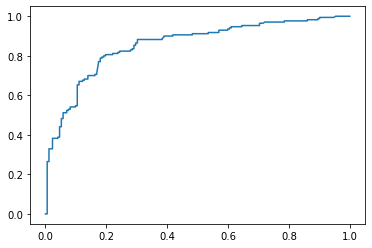

In [97]:
plt.plot(fpr,tpr)
plt.show()

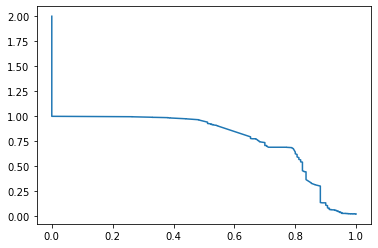

In [98]:
plt.plot(tpr,thresholds)
plt.show()

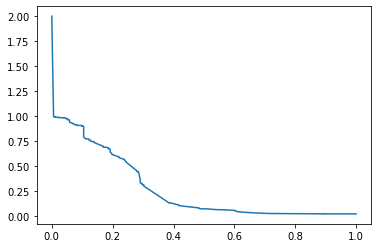

In [99]:
plt.plot(fpr,thresholds)
plt.show()

# Model Saving ---

In [100]:
import pickle
filename = 'titanic_project.pkl'
pickle.dump(gnb,open(filename,'wb'))

# Conclusion ---

In [102]:
df = pd.DataFrame()
df["Actual"]= y_test
df["Predict"]= gnb.predict(x_test)
print(df)

     Actual  Predict
564       0        0
122       0        0
400       0        0
953       1        0
134       0        0
..      ...      ...
90        1        1
865       1        1
979       1        1
45        0        0
416       0        0

[342 rows x 2 columns]


The Accuracy score in case of Gradient Boosting Classifier is the highest i.e 86.84 %